# Irreducible representations

In [1]:
from su2nn_e3nn_core.su2 import Irreps

In [2]:
# physical vector 
irreps = Irreps("1oe")
irreps

1x1oe

In [3]:
# spin
irreps2 = Irreps("1eo")
irreps2

1x1eo

In [4]:
# Tuple[Tuple[int, Tuple[int, int]]]
# ((multiplicity, (l, p)), ...)

print(len(irreps))
mul_ir = irreps[0]  # a tuple

print(mul_ir)
print(len(mul_ir))
mul = mul_ir[0]  # an int
ir = mul_ir[1]  # another tuple

print(mul)

print(ir)
# print(len(ir))  ir is a tuple of 2 ints but __len__ has been disabled since it is always 2
l = ir[0]
p = ir[1]

print(l, p)

1
1x1oe
2
1
1oe
1 -1


In [5]:
import torch
t = torch.tensor

# show the transformation matrix corresponding to the inversion
irreps.D_from_angles(alpha=t(0.0), beta=t(0.0), gamma=t(0.0), k=t(1))

tensor([[-1.+0.j, -0.+0.j, -0.+0.j],
        [-0.+0.j, -1.+0.j, -0.+0.j],
        [-0.+0.j, -0.+0.j, -1.+0.j]], dtype=torch.complex128)

In [6]:
# a small rotation around the y axis
irreps.D_from_angles(alpha=t(0.1), beta=t(0.0), gamma=t(0.0), k=t(0))

tensor([[0.9950+0.0998j, 0.0000+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 1.0000+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000+0.0000j, 0.9950-0.0998j]],
       dtype=torch.complex128)

In [7]:
irreps = Irreps("7x0ee + 3x0oe + 5x1oe + 5x2oe")

tensor([[ 1.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  ...,
          0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j],
        [ 0.0000+0.0000j,  1.0000+0.0000j,  0.0000+0.0000j,  ...,
          0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j],
        [ 0.0000+0.0000j,  0.0000+0.0000j,  1.0000+0.0000j,  ...,
          0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j],
        ...,
        [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  ...,
          0.4996-0.0000j,  0.0000-0.0000j, -0.0000+0.0000j],
        [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  ...,
         -0.0000+0.0000j,  0.4373+0.2239j,  0.0000-0.0000j],
        [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  ...,
         -0.0000+0.0000j, -0.0000+0.0000j, -0.1512-0.2097j]],
       dtype=torch.complex128)


Text(0.5, 1.0, 'Imag')

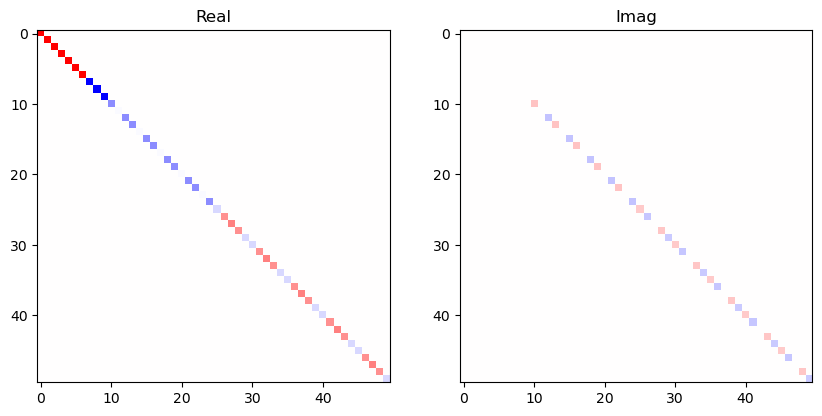

In [22]:
from su2nn_e3nn_core import su2
rot = -su2.rand_matrix()

D = irreps.D_from_matrix(rot)
print(D)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize = (10, 5))
ax1, ax2 = axs[0], axs[1]
ax1.imshow(D.real, cmap='bwr', vmin=-1, vmax=1)
ax1.set_title('Real')
ax2.imshow(D.imag, cmap='bwr', vmin=-1, vmax=1)
ax2.set_title('Imag')

# Convolution